Name: Faiyaj Abrar
ID: 200021250

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Import machine learning tools from Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# Load the dataset
data = pd.read_csv("heart-disease-cleaned.csv")

In [19]:
# Exploratory Data Analysis (EDA)
## Display dataset overview
print("First few rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())

First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis  
0    3.0  0.0   6.0          0  
1    2.0  3.0   3.0          1  
2    2.0  2.0   7.0          1  
3    3.0  0.0   3.0          0  
4    1.0  0.0   3.0          0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   cp         297 n

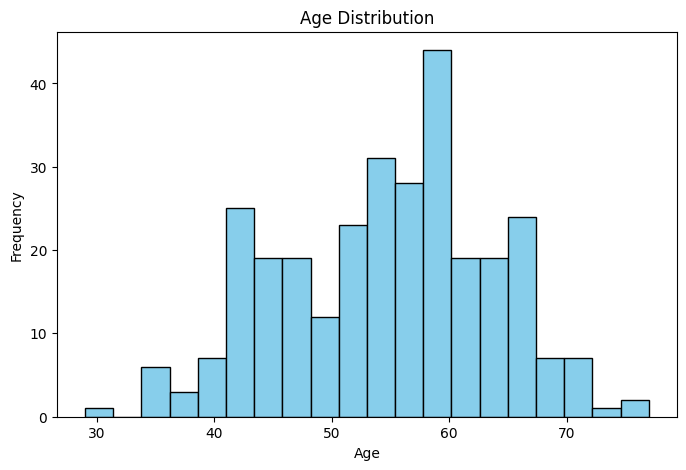

In [20]:
# Plot histogram of Age distribution
plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

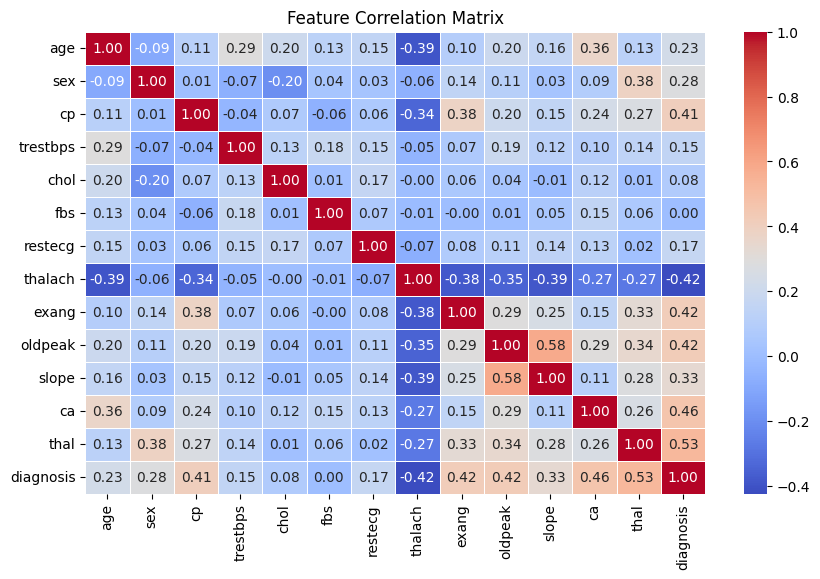

In [21]:
# Compute and visualize correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [22]:
# Split features and target
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis']  # Target variable

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

In [26]:
# Evaluate Random Forest model
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8833333333333333
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



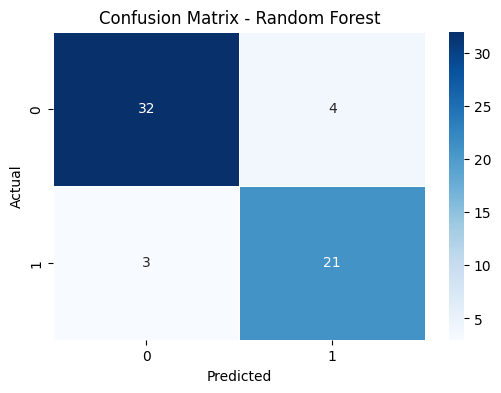

In [27]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()